# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results            
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path) 

# Combine the data into a single DataFrame             
#Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
#"Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)"

study_data_complete= pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete .head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice =len(study_data_complete ['Mouse ID'].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete .duplicated(subset=("Mouse ID","Timepoint"), keep =False)

duplicate_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_ID = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID_data=study_data_complete.loc[study_data_complete ['Mouse ID'] == duplicate_mice_ID[0]]  
duplicate_mice_ID_data 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_drop_df=study_data_complete.drop(duplicate_mice_ID_data.index)
clean_data_drop_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice=len(clean_data_drop_df['Mouse ID'].unique())
total_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_group = clean_data_drop_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
meadian= drug_regimen_group['Tumor Volume (mm3)'].median()
variance=drug_regimen_group['Tumor Volume (mm3)'].var()
Std_Dev=drug_regimen_group['Tumor Volume (mm3)'].std()
sem=drug_regimen_group['Tumor Volume (mm3)'].sem()

summary_statistics=pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":meadian,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev.":Std_Dev,
    "Tumor Volume Std. Err.":sem
    
})

# Assemble the resulting series into a single summary DataFrame.

pd.DataFrame(summary_statistics)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped =clean_data_drop_df.groupby("Drug Regimen")
# Using the aggregation method, produce the same summary statistics in a single line
summary =grouped["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
pd.DataFrame(summary)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '#Of Obeserved Mouse Timepoints')

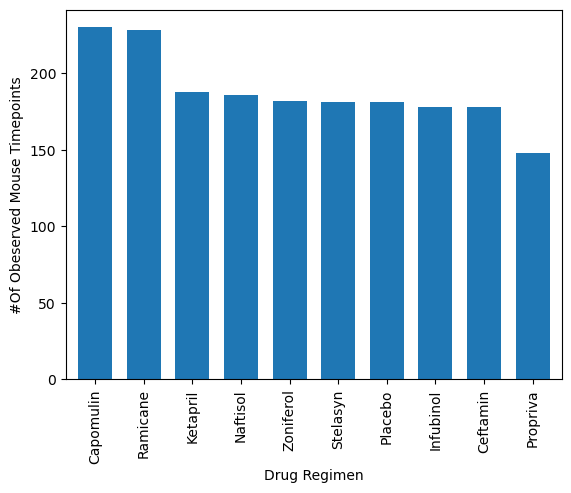

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
no_mice_per_regimen_df = clean_data_drop_df ['Drug Regimen'].value_counts()

pd_bar_graph_drug_regimen = no_mice_per_regimen_df.plot(kind="bar", width=0.7)
pd_bar_graph_drug_regimen.set_xlabel('Drug Regimen')
pd_bar_graph_drug_regimen.set_ylabel('#Of Obeserved Mouse Timepoints')



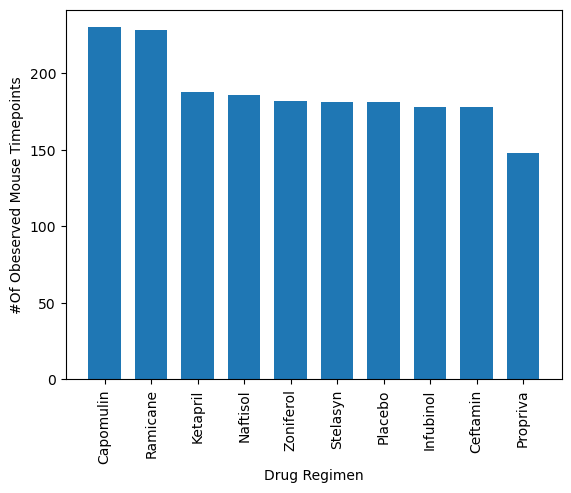

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drud_regimen_name = list(no_mice_per_regimen_df.index.values)
x_axis_regimen = np.arange(len(no_mice_per_regimen_df))


py_bar_mice_per_regimen_df = plt.bar(x_axis_regimen,no_mice_per_regimen_df ,  width=0.7)

plt.xticks(x_axis_regimen, Drud_regimen_name, rotation='vertical')

plt.xlabel('Drug Regimen')
plt.ylabel('#Of Obeserved Mouse Timepoints')



plt.show()




Text(0, 0.5, 'Sex')

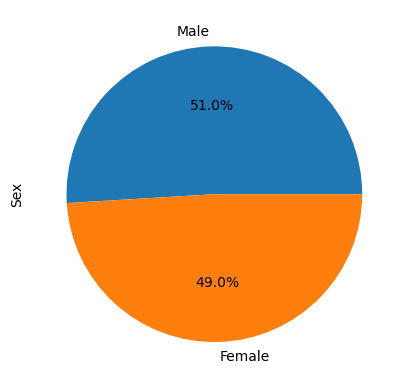

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_male_female=clean_data_drop_df["Sex"].value_counts()

pd_pie_female_male =sex_male_female .plot(kind='pie', autopct='%1.1f%%')

pd_pie_female_male.set_ylabel('Sex')


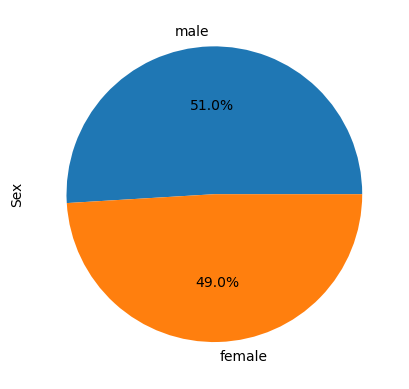

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["male","female"]
py_bar_mice_sex = plt.pie( sex_male_female, labels= labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = clean_data_drop_df.groupby(['Drug Regimen', 'Mouse ID'])[['Timepoint', 'Tumor Volume (mm3)']].last()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = final_tumor_volume.reset_index()


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_volume_list.append(final_tumor_volume)
      

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
    
    lowerq = quartiles[0.25]
    
    upperq = quartiles[0.75]
     
    mean = final_tumor_volume.mean()
    
    iqr = upperq-lowerq    
    
    lower_bound = lowerq - (1.5*iqr)
    
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)  | (final_tumor_volume > upper_bound)]
    
    print(f"{drug}'s potential outliers Regimen:")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')

    
    

Capomulin's potential outliers Regimen:
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
Ramicane's potential outliers Regimen:
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
Infubinol's potential outliers Regimen:
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
Ceftamin's potential outliers Regimen:
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could b

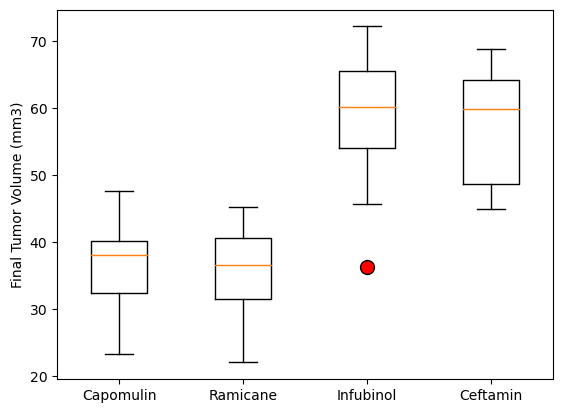

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_volume_plot = plt.subplots()
final_tumor_volume_plot.boxplot(final_tumor_volume_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

final_tumor_volume_plot.set_ylabel('Final Tumor Volume (mm3)')

plt.show()                     

## Line and Scatter Plots

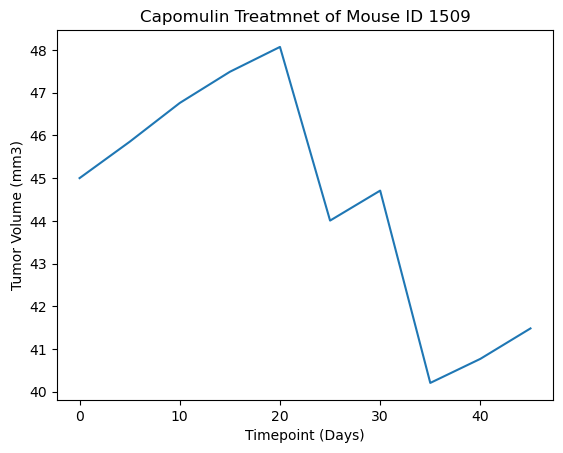

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_data_drop_df.loc[clean_data_drop_df['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

plt.title('Capomulin Treatmnet of Mouse ID 1509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

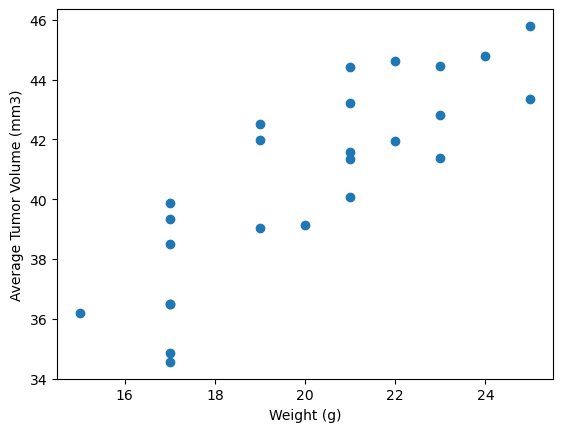

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
grouped_data = Capomulin_df.groupby('Mouse ID').agg(weight=('Weight (g)', 'mean'),
               avg_tumor_volume=('Tumor Volume (mm3)', 'mean'))

x_value=grouped_data['weight']
y_value=grouped_data['avg_tumor_volume']

plt.scatter(x_value,y_value )

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation coefficient for mouse weight and tumor volume is 0.84
The regration coefficient for mouse weight and tumor volume is y = 0.95x + 21.55
Slope (m): 0.95
Intercept (b): 21.55


Text(0, 0.5, 'Average Tumor Volume (mm3)')

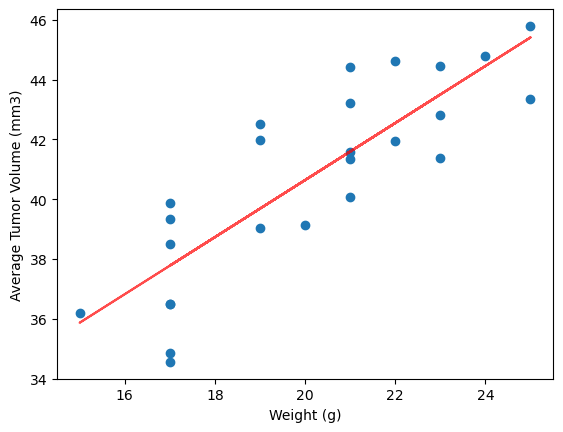

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


correlation =x_value.corr(y_value)

print(f"The correlation coefficient for mouse weight and tumor volume is {correlation:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = (st.linregress(x_value, y_value))

#y=ax+b
regression_values = x_value * slope + intercept

line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"The regration coefficient for mouse weight and tumor volume is {line_eq}")
print(f"Slope (m): {slope:.2f}")
print(f"Intercept (b): {intercept:.2f}")

plt.scatter(x_value,y_value)

plt.plot(x_value,regression_values, color='r', alpha=0.7)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

